In [1]:
# import library
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates
from matplotlib import rcParams

from collections import deque
import pandas as pd
import numpy as np


In [2]:
%matplotlib notebook

In [3]:
plt.rcParams['animation.ffmpeg_path'] ='H:\\LG\\ffmpeg-20200628-4cfcfb3-win64-static\\bin\\ffmpeg.exe'
FFwriter=animation.FFMpegWriter(fps=10, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


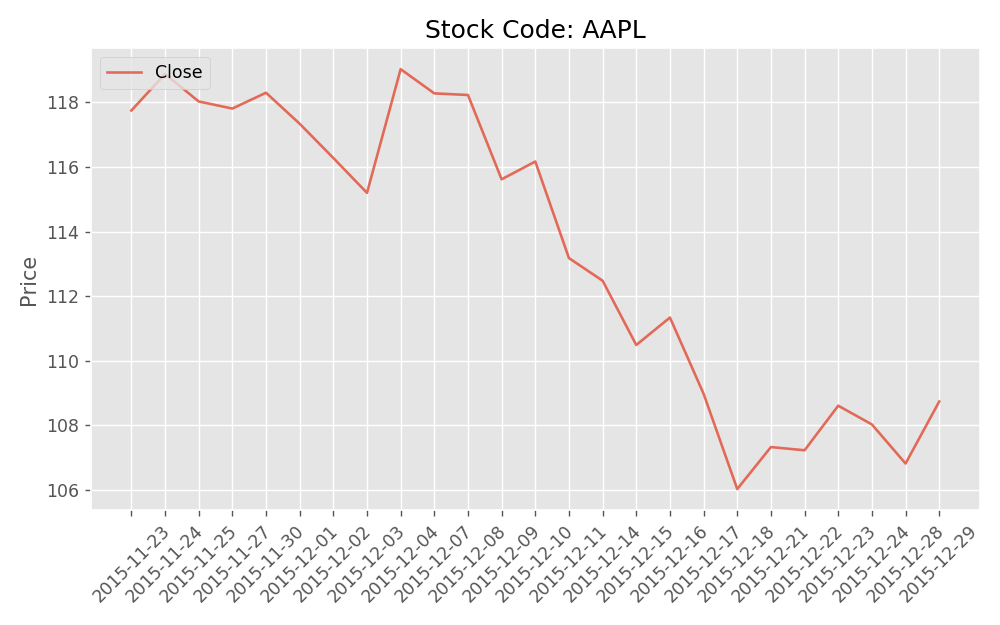

In [5]:
plt.style.use('ggplot')
plt.ion()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlim(0,31)

#make deque
xs = deque(maxlen=31)
ys = deque(maxlen=31)

identifier = "AAPL"

def animate(i):
    data = pd.read_csv('./Stock/raw_data/data.csv')
    num = len(data)
#     print("len : {}".format(num))
    
    x_deque = deque(maxlen=25)
    y_deque = deque(maxlen=25)

    x = data['Date'].values
    y = data['Close'].values

    for i in x:
        x_deque.append(i)
    for i in y:
        y_deque.append(i)
    
    plt.cla()
    plt.ylabel('Price')
    plt.title('Stock Code: {}'.format(identifier))
    plt.plot(x_deque, y_deque, alpha=0.8, label="Close")
    
    plt.xticks(rotation=45)

    
    plt.legend(loc='upper left')
    plt.tight_layout()



In [ ]:
ani = animation.FuncAnimation(plt.gcf(), animate, interval=500)
ani.save('./Stock/result/{}.gif'.format(identifier), writer='imagemagick', fps=30)
plt.show()